<a href="https://colab.research.google.com/github/sarnavadatta/Predictive-Modelling/blob/main/LoanDefault_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/DS projects/Loan Default Prediction/'

data_loan_default.xlsx	LoanDefault_ML.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/drive/My Drive/DS projects/Loan Default Prediction/data_loan_default.xlsx')
df.head()

,loan_amnt,term,installment,emp_length,home_ownership,verification_status,issue_d,purpose,dti,earliest_cr_line,...,pub_rec,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off
0,5675,36,189.56,2.0,RENT,Source Verified,2014-12-01,car,15.55,1992,...,0,15.0,15,Individual,0.0,0.0,4.698979,697.0,3.464936,0
1,7000,36,242.63,1.0,RENT,Source Verified,2014-12-01,car,6.78,2002,...,0,69.2,5,Individual,0.0,0.0,4.301052,717.0,3.431364,0
2,3500,36,116.24,10.0,MORTGAGE,Not Verified,2014-12-01,car,10.65,1997,...,0,12.6,35,Individual,2.0,0.0,4.681250,742.0,3.765520,0
3,10000,36,316.47,10.0,MORTGAGE,Not Verified,2014-12-01,car,21.74,1996,...,0,23.7,22,Individual,4.0,0.0,4.875067,707.0,3.424555,0
4,1500,36,46.31,2.0,OWN,Not Verified,2014-12-01,car,12.17,1997,...,0,46.5,13,Individual,2.0,0.0,4.812920,712.0,4.448211,0


**Exploratory Data Analysis**

In [ ]:
print(df.isnull().sum())

loan_amnt                  0
term                       0
installment                0
emp_length               425
home_ownership             0
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_util                14
total_acc                  0
application_type           0
mort_acc                1756
pub_rec_bankruptcies      17
log_annual_inc             0
fico_score                 0
log_revol_bal              0
charged_off                0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8929 entries, 0 to 8928
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             8929 non-null   int64         
 1   term                  8929 non-null   int64         
 2   installment           8929 non-null   float64       
 3   emp_length            8504 non-null   float64       
 4   home_ownership        8929 non-null   object        
 5   verification_status   8929 non-null   object        
 6   issue_d               8929 non-null   datetime64[ns]
 7   purpose               8929 non-null   object        
 8   dti                   8929 non-null   float64       
 9   earliest_cr_line      8929 non-null   int64         
 10  open_acc              8929 non-null   int64         
 11  pub_rec               8929 non-null   int64         
 12  revol_util            8915 non-null   float64       
 13  total_acc         

In [ ]:
# Calculate unique values for object type columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].unique()}")
    print(f"Number of unique values in '{col}': {df[col].nunique()}")
    print("-" * 20)


Unique values in 'home_ownership': ['RENT' 'MORTGAGE' 'OWN']
Number of unique values in 'home_ownership': 3
--------------------
Unique values in 'verification_status': ['Source Verified' 'Not Verified' 'Verified']
Number of unique values in 'verification_status': 3
--------------------
Unique values in 'purpose': ['car']
Number of unique values in 'purpose': 1
--------------------
Unique values in 'application_type': ['Individual' 'Joint App']
Number of unique values in 'application_type': 2
--------------------


In [ ]:
# verification_status status column has three value: ['Source Verified' 'Not Verified' 'Verified']. We replace 'Source Verified' to 'Verified'.
df['verification_status'] = df['verification_status'].replace({'Source Verified': 'Verified'})
df['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [ ]:
# purpose column only have one variable. Thus completely drop the column since it will not affect the prediction
df = df.drop(['purpose'], axis=1)

In [ ]:
print(df['application_type'].value_counts())

application_type
Individual    8908
Joint App       21
Name: count, dtype: int64


In [ ]:
# since almost all the application type is Individual, we are going to drop this column as well.
df = df.drop(['application_type'], axis=1)

In [ ]:
# emp_length and revol_util contain continuous numeric values. For those features, we replace the missing values by their respective median.
# For pub_rec_bankruptcies, we replace it with mode (most occured value, which is 0 in this scenario).

df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
# use knn imputer for  the missing values of mort_acc

from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select the columns with missing values you want to impute
cols_to_impute = ['mort_acc']

# Fit and transform the imputer on the selected columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


In [ ]:
print(df.isnull().sum())

loan_amnt               0
term                    0
installment             0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
log_annual_inc          0
fico_score              0
log_revol_bal           0
charged_off             0
dtype: int64


In [ ]:
# We notice that the earliest_cr_line variable provides the date of the earliest credit line of the customer.
# However, this does not provide any useful information because the loans are issued at different dates.
# Therefore, we transform this variable to obtain the number of years between the earliest credit line and the loan issue date.
# We also remove the issue_d feature.

df['yr_since_earliest_cr_line'] = pd.DatetimeIndex(df['issue_d']).year - df['earliest_cr_line']
df = df.drop(['earliest_cr_line','issue_d'], axis=1)


In [ ]:
df.head()

,loan_amnt,term,installment,emp_length,home_ownership,verification_status,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off,yr_since_earliest_cr_line
0,5675,36,189.56,2.0,RENT,Verified,15.55,7,0,15.0,15,0.0,0.0,4.698979,697.0,3.464936,0,22
1,7000,36,242.63,1.0,RENT,Verified,6.78,3,0,69.2,5,0.0,0.0,4.301052,717.0,3.431364,0,12
2,3500,36,116.24,10.0,MORTGAGE,Not Verified,10.65,16,0,12.6,35,2.0,0.0,4.681250,742.0,3.765520,0,17
3,10000,36,316.47,10.0,MORTGAGE,Not Verified,21.74,7,0,23.7,22,4.0,0.0,4.875067,707.0,3.424555,0,18
4,1500,36,46.31,2.0,OWN,Not Verified,12.17,8,0,46.5,13,2.0,0.0,4.812920,712.0,4.448211,0,17


**Train-Test Split & Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['charged_off'], axis=1)
y = df['charged_off']

In [ ]:
y.value_counts()

,count
charged_off,
0,7608
1,1321


In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((6696, 17), (2233, 17))

In [ ]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
OHE_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", OHE_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['home_ownership', 'verification_status'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['loan_amnt', 'term', 'installment', 'emp_length', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score', 'log_revol_bal',
       'yr_since_earliest_cr_line'],
      dtype='object'))])

In [ ]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [ ]:
# Handling class imbalance with smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

len(X_train_resample), len(y_train_resample)

(11420, 11420)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, confusion_matrix,\
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
rocauc_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_resample, y_train_resample) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_resample)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_resample, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_resample, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_resample, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_resample, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_resample, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    accuracy_scores.append(model_test_accuracy)
    f1_scores.append(model_test_f1)
    precision_scores.append(model_test_precision)
    recall_scores.append(model_test_recall)
    rocauc_scores.append(model_test_rocauc_score)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6638
- F1 score: 0.6636
- Precision: 0.6560
- Recall: 0.6890
- Roc Auc Score: 0.6638
----------------------------------
Model performance for Test set
- Accuracy: 0.6498
- F1 score: 0.6995
- Precision: 0.2557
- Recall: 0.6985
- Roc Auc Score: 0.6699


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7125
- F1 score: 0.7325
- Precision: 0.1809
- Recall: 0.2597
- Roc Auc Score: 0.5261


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8330
- F1 score: 0.8009
- Precision: 0.3561
- Recall: 0.1403
- Roc Auc Score: 0.5478


Gradient Boost
Model performance for Training se

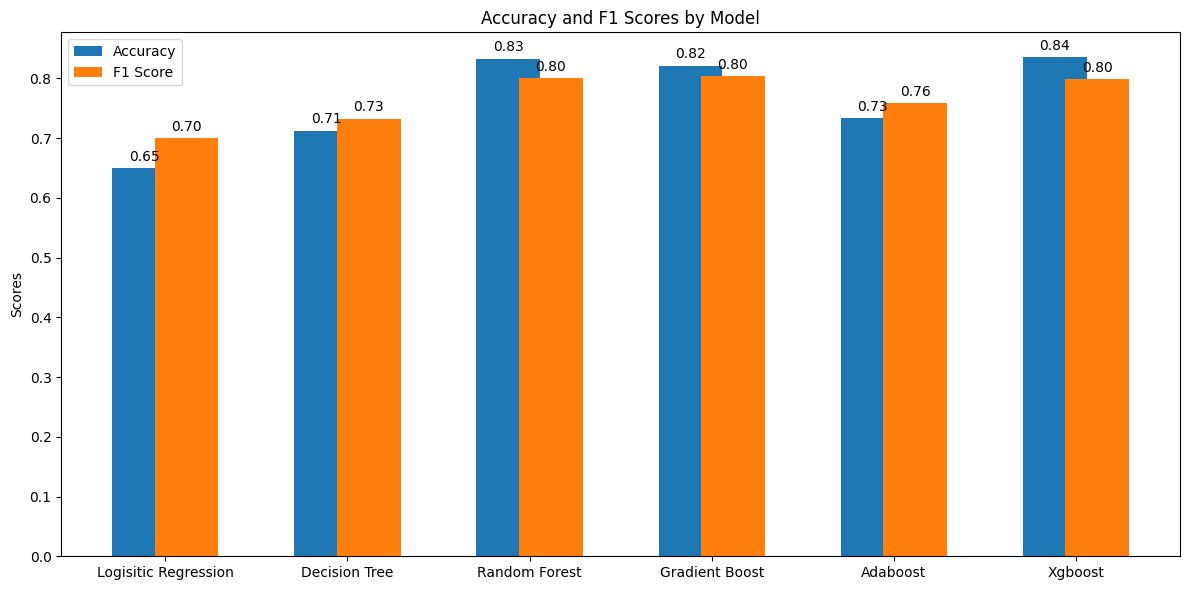

In [ ]:
model_names = list(models.keys())

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/3, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/3, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='{:.2f}')
ax.bar_label(rects2, padding=3, fmt='{:.2f}')

fig.tight_layout()

plt.show()

**Fitting XGBoost**

In [ ]:
# Training the XGB model as it is the best fit model

# Train the model with XGBoost
model = XGBClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=500,
    random_state=42
)
model.fit(X_train_resample, y_train_resample)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1898
           1       0.35      0.24      0.29       335

    accuracy                           0.82      2233
   macro avg       0.61      0.58      0.59      2233
weighted avg       0.79      0.82      0.80      2233



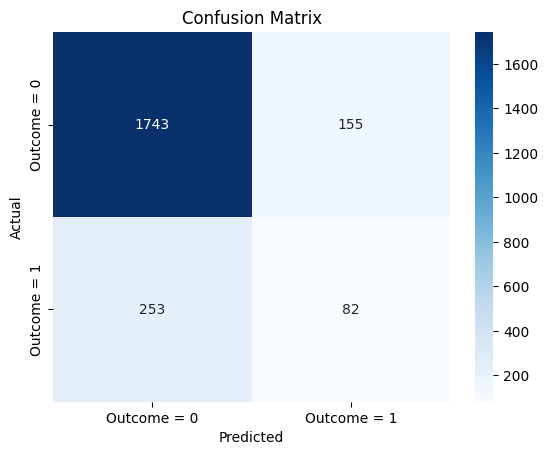

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Outcome = 0", "Outcome = 1"], yticklabels=["Outcome = 0", "Outcome = 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter Training for Gradient Boosting Parameter
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 300, 400, 500],
              "max_depth": [5, 8, 10, 15, None]
                }

# Models list for Hyperparameter tuning
randomcv_models = [("GradientBoost", GradientBoostingClassifier(), gradient_params)]


model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_resample, y_train_resample)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 400, 'min_samples_split': 15, 'max_depth': None, 'loss': 'exponential', 'criterion': 'squared_error'}


In [ ]:
Best_fit_model=GradientBoostingClassifier(n_estimators=400,
                                          min_samples_split=15,
                                          max_depth=None,
                                          loss='exponential',
                                          criterion='squared_error')

Best_fit_model.fit(X_train_resample, y_train_resample) # Train model

# Make predictions
y_test_pred = Best_fit_model.predict(X_test)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Model performance for Test set
- Accuracy: 0.8442
- F1 score: 0.7997
- Precision: 0.4133
- Recall: 0.0925
- Roc Auc Score: 0.5347


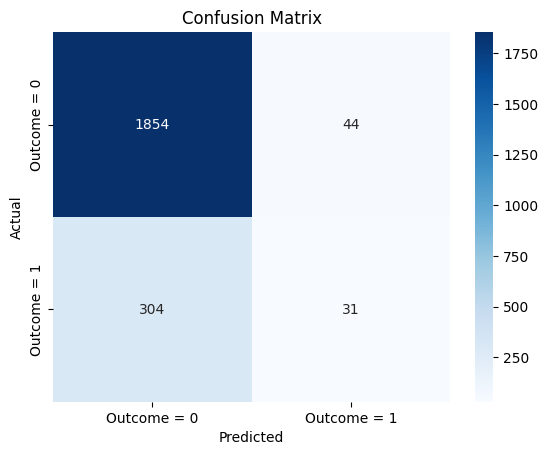

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_GBC = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_GBC, annot=True, fmt='d', cmap='Blues', xticklabels=["Outcome = 0", "Outcome = 1"], yticklabels=["Outcome = 0", "Outcome = 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()